# Classification with Artificial Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The IRIS dataset

In the following we start using a [dataset](https://archive.ics.uci.edu/dataset/53/iris) (from UCI Machine Learning repository) called IRIS, which contains 3 classes of iris plants (*setosa*, *versicolor*, *virginica*) with 4 features (*sepal length*, *sepal width*, *petal length*, *petal width*).

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Model declaration

The type of prediction model and the working criteria for the model induction algorithm are declared using scikit-learn. In this case, we use a Multi-layer Perceptron (MLP) classifier. The parametrization of this first classifier is arbitrary and will result in subpar performance.

In [4]:
from sklearn.neural_network import MLPClassifier
clf_ANN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)

## Training and test sets

We split the dataset in a training set (to be used to fit the model) and a test set (to be used to evaluate the quality of the fitted model). In this case, we keep only 10 examples for testing selected randomly from the original dataset (using numpy).

In [5]:
np.random.seed(0)

# Generate a random permutation of the indices of examples that will be later used
# for the training and the test set
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [6]:
# fit the model to the training data
clf_ANN = clf_ANN.fit(iris_X_train, iris_y_train)

Scikit-learn allows to access the network's training set score and loss after the training phase.

In [7]:
print("Training set score: " + str(clf_ANN.score(iris_X_train, iris_y_train)))
print("Training set loss: " + str(clf_ANN.loss_))

Training set score: 0.6714285714285714
Training set loss: 0.5559834895588641


The training loss curve can be plotted to visualize how Loss evolves during training. Beware that this curve is not gathered by all optimizers (Adam does, LBFGS doesn't).

**Adam ** is a popular and efficient ML optimizer that uses the first and second moments of the gradients to adaptively adjust the learning rate for each parameter during training. It combines *Momentum* (accelerates convergence with a moving average of past gradients) and *RMSProp* (uses the decaying moving average of squared gradients) to smooth out oscillations and prevent the vanishing or exploding gradient problems.

In [8]:
clf_ANN_sdg = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)
clf_ANN_sdg = clf_ANN_sdg.fit(iris_X_train, iris_y_train)

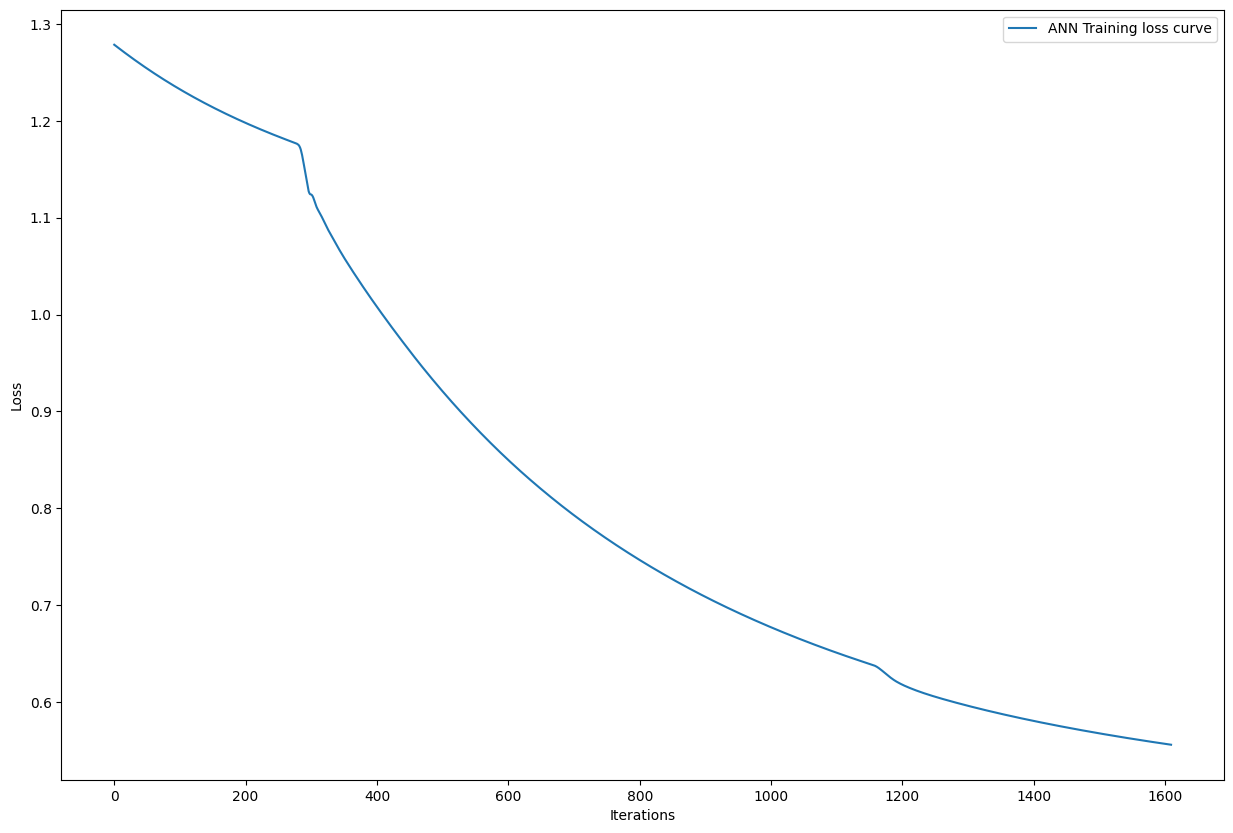

In [9]:
# The learning curve is plotted using Matplotlib
fig, axis = plt.subplots(1, figsize=(15, 10))
axis.set_xlabel("Iterations")
axis.set_ylabel("Loss")
axis.plot(clf_ANN.loss_curve_, label="ANN Training loss curve")
axis.legend()

Once the model has been trained, it can be used to predict the class of the flowers in the test set.

In [10]:
predicted_y_test = clf_ANN.predict(iris_X_test)

print(iris.target_names)

# print the predictions (class numbers associated to classes names in target names)
print("\nPredictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test)

['setosa' 'versicolor' 'virginica']

Predictions:
[2 2 2 0 0 0 2 2 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


Pandas is used to display the test data with corresponding predicted labels.

In [11]:
results_data = []

for i in range(len(iris_y_test)):
    feature_values = [iris_X_test[i][j] for j in range(len(iris.feature_names))]

    results_data.append({
        'Instance': indices_test[i],
        iris.feature_names[0]: feature_values[0],
        iris.feature_names[1]: feature_values[1],
        iris.feature_names[2]: feature_values[2],
        iris.feature_names[3]: feature_values[3],
        'Predicted': iris.target_names[predicted_y_test[i]],
        'True Class': iris.target_names[iris_y_test[i]],
        'Correct': 'Yes' if predicted_y_test[i] == iris_y_test[i] else 'No'
    })

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False, float_format='%.1f'))

 Instance  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) Predicted True Class Correct
       88                5.6               3.0                4.1               1.3 virginica versicolor      No
       70                5.9               3.2                4.8               1.8 virginica versicolor      No
       87                6.3               2.3                4.4               1.3 virginica versicolor      No
       36                5.5               3.5                1.3               0.2    setosa     setosa     Yes
       21                5.1               3.7                1.5               0.4    setosa     setosa     Yes
        9                4.9               3.1                1.5               0.1    setosa     setosa     Yes
      103                6.3               2.9                5.6               1.8 virginica  virginica     Yes
       67                5.8               2.7                4.1               1.0 virginica ve

## Performance metrics

Scikit-learn provides several built-in functions to evaluate the quality of the predictions, in this case we use accuracy and F1-score.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [13]:
# print some metrics results
acc_scoreANN = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score ANN: "+ str(acc_scoreANN))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score ANN: "+ str(f1))

Accuracy score ANN: 0.6
F1 score ANN: 0.5


## Cross Validation

Scikit-learn provides several built-in functions to perform cross-validation. In this case we use a $5$-fold cross-validation, and we compute the accuracy and F1-score for each fold.

In [14]:
from sklearn.model_selection import cross_val_score # will be used to separate training and test

In [15]:
iris = load_iris()
clf_ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [16]:
scoresANN = cross_val_score(clf_ANN, iris.data, iris.target, cv=5) # score will be the accuracy
print(scoresANN)
f1_scoresANN = cross_val_score(clf_ANN, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scoresANN)

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Scikit-learn provides built-in facilities to visualize learning curves, by also employing CV on training set of increasing size, allowing to visualize overfitting/underfitting phenomena.

In [17]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.utils import shuffle

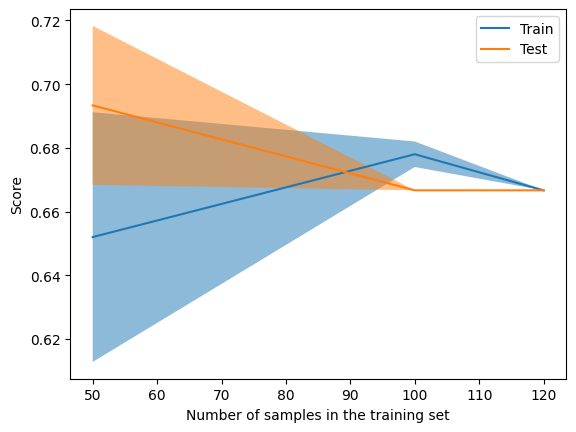

In [18]:
iris_x, iris_y = load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
clf_ANN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)
LearningCurveDisplay.from_estimator(clf_ANN, iris_x, iris_y, train_sizes=[50, 100, 120], cv=5)

P.S. certain optimizers (like Adam) raise several convergence warnings if the maximum number of iterations is not sufficient to reach convergence. This can be visually problematic especially when trying to search for best hyperparameters (try to run the above cell with `max_iter=400`). In this case, it is possible to disable the warnings as follows:

```python
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
```

# Your work: what you have to do

Modify the given Jupyter notebook on ANN on Iris data and perform the following tasks:

1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.
2. build the ROC curve (or coverage curve in coverage space) and plot it for the ANN: you have to build three curves, one for each class, considered in turn as the positive class.
3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the ANN in this condition. In this case we have more examples in the dataset!

**Note:** Be careful in the random sampling when you divide the dataset into training- and test-set: no examples of the training-set should go in the test- set.

4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the ANN in this condition. You should obtain similar results as for step 3.

**Note:** Be careful to the values of the iperparameters you use if you want to obtain the same results as with the step 3: they should be set in a value that is proportionated to the number of examples in the training-set.

5. learn the ANN but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Consider the following hyperparameters:

- hidden_layer_sizes
- activation = {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
- solver = {‘lbfgs’, ‘sgd’, ‘adam’}
- alpha (L2 regularization term)
- batch_size (size of the mini-batch)
- learning_rate = {‘constant’, ‘invscaling’, ‘adaptive’}
- early_stopping: bool
- warm_start: bool
- max_iter

Decide yourself the suitable possible values for each of them.

6. build the ROC curves of best models (obtained after hyperparameter tuning) for both DT and ANN for each of the three classes (with *one-vs-rest* methodology). Compare the two models.